### **주석을 달아놓았습니다.**  
읽으시고도 이해되지 않는 내용이 있다면 카카오톡으로 연락 남겨 주시면 감사하겠습니다.  

### **진행상황공유**
  
전승현 팀원 / 진행사항 주요 내용   
금요일까지)
- 결정 트리 모델에 관한 공부 (X)
- 시계열로부터 요일, 시간 특성 생성 (V)
- 시간 특성으로부터 출퇴근 시간 특성 생성 (V)
- 요일 특성으로부터 주중, 주말 특성 생성 (V)
- 시간 특성으로부터 낮, 밤 특성 생성 (V)
- 온도, 체감 온도 특성으로부터 온도 구간, 체감 온도 구간 특성 생성 (V)
- 노션 시나리오대로 groupby(혹은 그와 비슷한 매서드)를 통하여 특성끼리 엮어보기 (X)
- 엮인 특성간의 상관 관계를 보기 위한 시각화 / 바차트, 파이차트, 히스토그램 등 사용 (X)
- 상관 관계 분석 후, 예측한 시나리오가 맞았는지, 맞았다면 그 이유를 다른 특성에서 찾을 수 있는지, 맞지 않았다면 그 이유를 다른 특성에서 찾을 수 있는지 확인하기 (X)  
- 데이터 분석을 토대로 내릴 수 있는 유의미한 결과가 존재하는지 정리하고, 무의미한 결과는 어떻게 보완할 것인지 정리하기 (X)

수요일까지)
- 데이터 전처리와 StandardScaler 사용을 통한 scale을 맞춰주는 전처리 (X)
- 분류 모델이 아닌 예측 모델에 관한 알고리즘 찾기, 설명과 이유까지 (X)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from google.colab import files
myfile = files.upload()

In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#train_df = pd.read_csv(io.BytesIO(myfile['train.csv']))
#test_df = pd.read_csv(io.BytesIO(myfile['test.csv']))

In [3]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [4]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


datetime = 날짜와 시간 타임스탬프  
season = 계절 1: 봄, 2: 여름, 3: 가을, 4: 겨울 
holiday = 휴일인 날  
workingday = 주말이나 휴일이 아닌 날  
weather = 날씨 1: 맑음 2: 안개 3: 약한 눈, 비 4: 강한 눈, 비    
temp = 섭씨 온도  
atemp = 체감 섭씨 온도    
humidity = 상대 습도  
windspeed = 풍속  
casual = 미등록 사용자 대여수  
registered = 등록 사용자 대여수  
count = 총 대여수  

In [5]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
test_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [7]:
# https://ko.wikipedia.org/wiki/%EC%9B%8C%EC%8B%B1%ED%84%B4_D.C.
# https://ko.wikipedia.org/wiki/%EC%9B%8C%EC%8B%B1%ED%84%B4_D.C.%EC%9D%98_%EA%B5%90%ED%86%B5

# 2010 워싱턴 DC 인구 수 601,173 // 인구수 대비 공유 자전거 이용 비율을 살펴 볼 수 있을까?
# 출처: "Resident Population Data". United States Census Bureau. 2010.

# 워싱턴의 대중교통을 이용한 출퇴근 시간은 평일 평균 86분이다. // 출퇴근 소요시간을 2시간으로 설정한다.
# 대중교통 이용객 31% 매일 2시간 이상 탑승 대중교통을 위해 정류장이나 역에서 대기하는 시간은 평균 19분이며, 
# 이용자의 34%가 매일 평균 20분 이상 대기하고 있다. 
# 대중교통을 이용한 한 번의 여행에서 보통 사람들이 타는 평균 거리는 8.8km인 반면, 20%는 한 방향으로 12km 이상 이동한다. 
# 출처: "Washington Public Transportation Statistics"(English). Global Public Transit Index by Moovit. 2020.

# datetime 패키지를 통해 datetime 열의 데이터타입을 datetime으로 변환한다.
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
# datetime 시계열로부터 요일, dayofweek 특성 추가 // Mon = 0, ... , Sun = 6
train_df['dayofweek'] = train_df['datetime'].dt.dayofweek 
train_df['datetime_date'] = train_df['datetime'].dt.date
train_df['datetime_month'] = train_df['datetime'].dt.month
# datetime 시계열로부터 시간, datetime_hour 특성 추가
train_df['datetime_hour'] = train_df['datetime'].dt.hour
# dayofweek 특성에서 주말을 찾아서 weekend 특성에 추가 // 1: 주말, 0: 주말아님
train_df['weekend'] = np.where(train_df['dayofweek'].values > 4, 1, 0)
# dayofweek 특성에서 주중을 찾아서 weekdat 특성에 추가 // 1: 주중, 0: 주중아님 // weekend와 정반대의 특성
train_df['weekday'] = np.where(train_df['dayofweek'].values < 5, 1, 0) 
# datetime_hour 특성에서 오전 7시부터 오전 9시 사이, 오후 5시부터 오후 7시 사이를 출퇴근 시간이라 판단하고 commute_time 특성에 추가 // 1: 출퇴근 시간, 0: 출퇴근 시간아님
train_df['commute_time'] = np.where(((train_df['datetime_hour'] >= 7) & (train_df['datetime_hour'] < 9) & (train_df['weekend'] != 1) & (train_df['workingday'] == 1)) | 
                                    ((train_df['datetime_hour'] >= 17) & (train_df['datetime_hour'] < 19) & (train_df['weekend'] != 1) & (train_df['workingday'] == 1)), 1, 0)
# datetime_hour 특성에서 오전 6시부터 오후 6시 사이를 1, 오후 6시부터 오전 6시 사이를 0로 dayandnight 특성에 추가
# train_df['dayandnight'] = np.where(((train_df['datetime_hour'] >= 6) & (train_df['datetime_hour'] < 18)) , 1, 0)
# train_df.describe()를 통해 temp와 atemp의 최소온도와 최대온도를 확인하고 이를 포함하는 0도에서부터 50도까지를 5도 간격으로 나눈 구간을 bins 리스트에 추가
test_df['datetime'] = pd.to_datetime(test_df['datetime'])
# datetime 시계열로부터 요일, dayofweek 특성 추가 // Mon = 0, ... , Sun = 6
test_df['dayofweek'] = test_df['datetime'].dt.dayofweek 
test_df['datetime_date'] = test_df['datetime'].dt.date
test_df['datetime_month'] = test_df['datetime'].dt.month
# datetime 시계열로부터 시간, datetime_hour 특성 추가
test_df['datetime_hour'] = test_df['datetime'].dt.hour
# dayofweek 특성에서 주말을 찾아서 weekend 특성에 추가 // 1: 주말, 0: 주말아님
test_df['weekend'] = np.where(test_df['dayofweek'].values > 4, 1, 0)
# dayofweek 특성에서 주중을 찾아서 weekdat 특성에 추가 // 1: 주중, 0: 주중아님 // weekend와 정반대의 특성
test_df['weekday'] = np.where(test_df['dayofweek'].values < 5, 1, 0) 
# datetime_hour 특성에서 오전 7시부터 오전 9시 사이, 오후 5시부터 오후 7시 사이를 출퇴근 시간이라 판단하고 commute_time 특성에 추가 // 1: 출퇴근 시간, 0: 출퇴근 시간아님
test_df['commute_time'] = np.where(((test_df['datetime_hour'] >= 7) & (test_df['datetime_hour'] < 9) & (test_df['weekend'] != 1) & (test_df['workingday'] == 1)) | 
                                    ((test_df['datetime_hour'] >= 17) & (test_df['datetime_hour'] < 19) & (test_df['weekend'] != 1) & (test_df['workingday'] == 1)), 1, 0)


bins = list(range(0, 60, 5))
# 구간을 보기 쉽게 str 문자열로 변환
bins_label = [str(x) + '이상 ' + str(x + 5) + '미만' for x in bins]
bins_labelmap = list(range(0,12,1))
# temp, atemp 연속적인 구간을 불연속적인 값, bins_label로 변환
train_df['tempCategory'] = pd.cut(train_df['temp'], bins, right = False, labels = bins_labelmap[:-1])
train_df['atempCategory'] = pd.cut(train_df['atemp'], bins, right = False, labels = bins_labelmap[:-1])
test_df['atempCategory'] = pd.cut(test_df['atemp'], bins, right = False, labels = bins_labelmap[:-1])


In [8]:
# 24시간 중 출퇴근 시간이 잘들어갔는지 확인해본다.
train_df.head(24)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,dayofweek,datetime_date,datetime_month,datetime_hour,weekend,weekday,commute_time,tempCategory,atempCategory
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,16,5,2011-01-01,1,0,1,0,0,1,2
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,40,5,2011-01-01,1,1,1,0,0,1,2
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,32,5,2011-01-01,1,2,1,0,0,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,13,5,2011-01-01,1,3,1,0,0,1,2
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,1,5,2011-01-01,1,4,1,0,0,1,2
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,...,1,5,2011-01-01,1,5,1,0,0,1,2
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,...,2,5,2011-01-01,1,6,1,0,0,1,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,...,3,5,2011-01-01,1,7,1,0,0,1,2
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,...,8,5,2011-01-01,1,8,1,0,0,1,2
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,...,14,5,2011-01-01,1,9,1,0,0,2,3


In [9]:
# https://ko.wikipedia.org/wiki/%EC%9B%8C%EC%8B%B1%ED%84%B4_D.C.
# https://ko.wikipedia.org/wiki/%EC%9B%8C%EC%8B%B1%ED%84%B4_D.C.%EC%9D%98_%EA%B5%90%ED%86%B5

# 2010 워싱턴 DC 인구 수 601,173
# Resident Population Data”. United States Census Bureau. 2010.

# 워싱턴의 대중교통을 이용한 출퇴근 시간은 평일 평균 86분이다. 
# 대중교통 이용객 31% 매일 2시간 이상 탑승 대중교통을 위해 정류장이나 역에서 대기하는 시간은 평균 19분이며, 
# 이용자의 34%가 매일 평균 20분 이상 대기하고 있다. 
# 대중교통을 이용한 한 번의 여행에서 보통 사람들이 타는 평균 거리는 8.8km인 반면, 20%는 한 방향으로 12km 이상 이동한다. 
#“Washington Public Transportation Statistics”(English). Global Public Transit Index by Moovit. 2020.

# 요일 별로 그룹을 나눈 뒤 해당 요일에 대하여 다른 특성의 평균을 구한다.
# 예를 들어, 2월 7일 월요일/ 2월 14일 월요일/ 2월 21일 월요일 등 월요일에 대여한 자전거 수의 평균, 또는 온도 등을 월요일 행에 나열한다.
# train_df_by_dayofweek_mean_all은 요일별로 모든 특성의 평균을 보여준다.
# train_df_by_dayofweek_sum_all은 요일별로 모든 특성의 값의 총 합을 보여준다.
# train_df_by_dayofweek_mean_count은 요일별로 자전거 대여 횟수의 평균을 보여준다.
# train_df_by_dayofweek_sum_count은 요일별로 자전거 대여 횟수의 총합을 보여준다.
# https://ko.wikipedia.org/wiki/%EC%9B%8C%EC%8B%B1%ED%84%B4_D.C.
# https://ko.wikipedia.org/wiki/%EC%9B%8C%EC%8B%B1%ED%84%B4_D.C.%EC%9D%98_%EA%B5%90%ED%86%B5

train_df_by_dayofweek_mean_all = train_df.groupby(train_df['dayofweek']).mean()
train_df_by_dayofweek_sum_all = train_df.groupby(train_df['dayofweek']).sum()
train_df_by_dayofweek_mean_count = train_df['count'].groupby(train_df['dayofweek']).mean().to_frame()
train_df_by_dayofweek_sum_count = train_df['count'].groupby(train_df['dayofweek']).sum().to_frame()
train_df_by_weekdayweekend_mean_count = train_df['count'].groupby(train_df['weekend']).mean().to_frame()
train_df_by_weekdayweekend_sum_count = train_df['count'].groupby(train_df['weekend']).sum().to_frame()

test_df_by_dayofweek_mean_all = test_df.groupby(test_df['dayofweek']).mean()
test_df_by_dayofweek_sum_all = test_df.groupby(test_df['dayofweek']).sum()


In [10]:
display(train_df_by_dayofweek_mean_all)
display(train_df_by_dayofweek_sum_all)
display(train_df_by_dayofweek_mean_count)
display(train_df_by_dayofweek_sum_count)
display(train_df_by_weekdayweekend_mean_count)
display(train_df_by_weekdayweekend_sum_count)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek,datetime_month,datetime_hour,weekend,weekday,commute_time
dayofweek,,,,,,,,,,,,,,,,,
0,2.560284,0.154094,0.845906,1.398453,20.620542,24.178507,62.508059,12.921691,29.843972,160.546744,190.390716,0.0,6.651193,11.549968,0.0,1.0,0.141844
1,2.511371,0.000000,1.000000,1.510721,20.732307,24.252898,63.662768,13.338829,22.979207,166.744639,189.723847,1.0,6.481481,11.596491,0.0,1.0,0.167641
2,2.482914,0.015474,0.984526,1.501612,20.323417,23.764271,64.299162,12.635379,22.521599,165.889749,188.411348,2.0,6.421019,11.548678,0.0,1.0,0.165055
3,2.480361,0.000000,1.000000,1.377978,20.251835,23.641465,58.397939,13.138079,24.007083,173.289118,197.296201,3.0,6.455248,11.537669,0.0,1.0,0.167418
4,2.506867,0.031393,0.968607,1.368215,19.993198,23.066609,59.913015,12.398527,31.001962,166.842381,197.844343,4.0,6.567691,11.535644,0.0,1.0,0.162198
5,2.500000,0.000000,0.000000,1.393939,19.668611,23.121266,61.253157,12.670136,63.625000,133.040404,196.665404,5.0,6.560606,11.500000,1.0,0.0,0.000000
6,2.504750,0.000000,0.000000,1.379354,20.041963,23.569766,63.151995,12.499344,57.051298,123.788474,180.839772,6.0,6.512983,11.524383,1.0,0.0,0.000000


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_month,datetime_hour,weekend,weekday,commute_time
dayofweek,,,,,,,,,,,,,,,,
0,3971,239,1312,2169,31982.46,37500.865,96950,20041.5425,46288,249008,295296,10316,17914,0,1551,220
1,3865,0,1539,2325,31907.02,37325.210,97977,20528.4583,35365,256620,291985,9975,17847,0,1539,258
2,3851,24,1527,2329,31521.62,36858.385,99728,19597.4732,34931,257295,292226,9959,17912,0,1551,256
3,3852,0,1553,2140,31451.10,36715.195,90692,20403.4363,37283,269118,306401,10025,17918,0,1553,260
4,3833,48,1481,2092,30569.60,35268.845,91607,18957.3485,47402,255102,302504,10042,17638,0,1529,248
5,3960,0,0,2208,31155.08,36624.085,97025,20069.4949,100782,210736,311518,10392,18216,1584,0,0
6,3955,0,0,2178,31646.26,37216.660,99717,19736.4647,90084,195462,285546,10284,18197,1579,0,0


,count
dayofweek,
0,190.390716
1,189.723847
2,188.411348
3,197.296201
4,197.844343
5,196.665404
6,180.839772


,count
dayofweek,
0,295296
1,291985
2,292226
3,306401
4,302504
5,311518
6,285546


,count
weekend,
0,192.724589
1,188.765096


,count
weekend,
0,1488412
1,597064


In [11]:
train_df_by_weekdayweekend_mean_count_notdf = train_df['count'].groupby(train_df['weekend']).mean()
train_df_by_weekdayweekend_sum_count_notdf = train_df['count'].groupby(train_df['weekend']).sum()

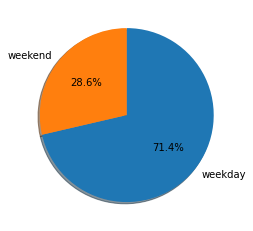

In [12]:
# 단순 대여수만 따졌을 때, 7일 중 5일을 차지하고 있는 주중의 대여수가 더 많을 것이다.
import matplotlib.pyplot as plt

labels = ['weekday', 'weekend']
explode = [0.05, 0.05]
colors = ['gray', 'red']
wedgeprops = {'width': 0.8, 'linewidth': 2}

plt.pie(train_df_by_weekdayweekend_sum_count_notdf, labels = labels, autopct='%.1f%%', startangle = 90, counterclock=False,
        shadow = True)
plt.show()
# 확인 결과 그러하다.

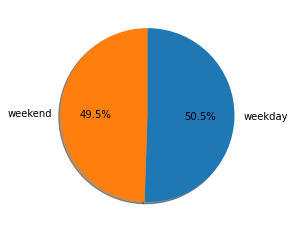

In [13]:
# 따라서 비교를 용이하게 하기 위해 평균으로 스케일을 맞춰 주중에 빌린 평균 대여수와 주말에 빌린 평균 대여수를 비교한다.
# 주중이 대여수가 더 많을 것이다.
# 대중교통으로 출퇴근이 복잡한 워싱턴 DC에서 자전거로의 출퇴근이 많을것이라 생각했기 때문이다.
import matplotlib.pyplot as plt

labels = ['weekday', 'weekend']
explode = [0.05, 0.05]
colors = ['gray', 'red']
wedgeprops = {'width': 0.8, 'linewidth': 2}

plt.pie(train_df_by_weekdayweekend_mean_count_notdf, labels = labels, autopct='%.1f%%', startangle = 90, counterclock=False,
        shadow = True)
plt.show()
# 확인 결과 주중이 평균 대여수가 많지만, 압도적으로 많다고 할 수는 없다.
# 그 이유는 무엇일까? 주중 출퇴근 시간을 통해 다시 확인해 보도록 하겠다.

count
weekend commute_time            
0       0             143.625212
        1             448.934783
1       0             188.765096

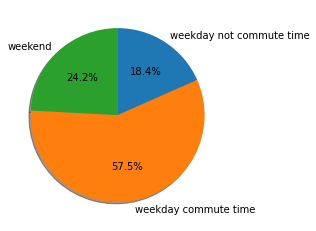

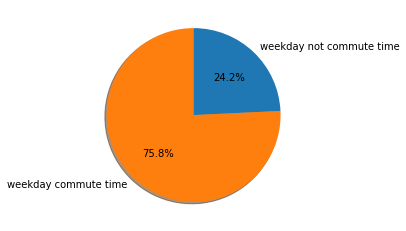

In [14]:
train_df_by_weekdayweekend_commute_mean_count = train_df.groupby(['weekend', 'commute_time'])['count'].mean().to_frame()
train_df_by_weekdayweekend_commute_mean_count_notdf = train_df.groupby(['weekend', 'commute_time'])['count'].mean()

display(train_df_by_weekdayweekend_commute_mean_count)

import matplotlib.pyplot as plt

labels = ['weekday not commute time', 'weekday commute time', 'weekend']
explode = [0.05, 0.05]
colors = ['gray', 'red']
wedgeprops = {'width': 0.8, 'linewidth': 2}

plt.pie(train_df_by_weekdayweekend_commute_mean_count_notdf, labels = labels, 
        autopct='%.1f%%', startangle = 90, counterclock=False, shadow = True)
plt.show()

import matplotlib.pyplot as plt

labels = ['weekday not commute time', 'weekday commute time']
# labels = train_df_by_weekdayweekend_commute_mean_count_notdf.index[0:2]
explode = [0.05, 0.05]
colors = ['gray', 'red']
wedgeprops = {'width': 0.8, 'linewidth': 2}

plt.pie(train_df_by_weekdayweekend_commute_mean_count_notdf[0:2], labels = labels,
        autopct='%.1f%%', startangle = 90, counterclock=False, shadow = True)
plt.show()
# 확인 결과 확실히 출퇴근 시간대에 대여수가 압도적으로 많음을 확인할 수 있었다.

,count
datetime_hour,
0,55.138462
1,33.859031
2,22.899554
3,11.757506
4,6.407240
5,19.767699
6,76.259341
7,213.116484
8,362.769231


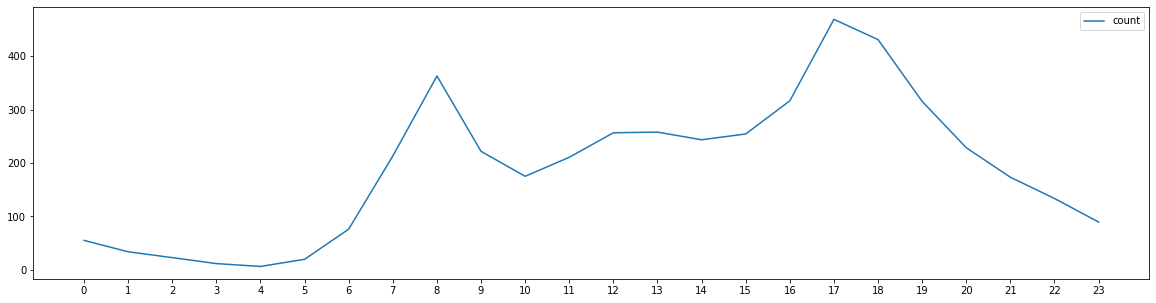

In [15]:
# 대여수가 많은 시간대와 출퇴근 시간대가 겹치는지 확인해보겠다.

train_df_by_datetime_hour_sum_count = train_df.groupby(['datetime_hour'])['count'].mean().to_frame()
train_df_by_datetime_hour_sum_count_notdf = train_df.groupby(['datetime_hour'])['count'].mean()

display(train_df_by_datetime_hour_sum_count)

import matplotlib.pyplot as plt

plt.figure(figsize = (20 ,5))
plt.plot(train_df_by_datetime_hour_sum_count, label = 'count')
plt.xticks(range(24), range(24))
plt.legend()
plt.show()

# 특정 시간대에 대여수가 많은 이유를 출퇴근 시간대라는 이유로 찾았다.

In [16]:
train_df['datetime_date'][train_df['holiday'] == 1].unique() # 7월 4일 독립기념일도 포함되어 있음을 알 수 있다.

array([datetime.date(2011, 1, 17), datetime.date(2011, 4, 15),
       datetime.date(2011, 7, 4), datetime.date(2011, 9, 5),
       datetime.date(2011, 10, 10), datetime.date(2011, 11, 11),
       datetime.date(2012, 1, 2), datetime.date(2012, 1, 16),
       datetime.date(2012, 4, 16), datetime.date(2012, 7, 4),
       datetime.date(2012, 9, 3), datetime.date(2012, 10, 8),
       datetime.date(2012, 11, 12)], dtype=object)

In [17]:
train_df['datetime_date'][train_df['workingday'] == 1].unique() # 주말과 휴일을 뺀 workingday이다.

array([datetime.date(2011, 1, 3), datetime.date(2011, 1, 4),
       datetime.date(2011, 1, 5), datetime.date(2011, 1, 6),
       datetime.date(2011, 1, 7), datetime.date(2011, 1, 10),
       datetime.date(2011, 1, 11), datetime.date(2011, 1, 12),
       datetime.date(2011, 1, 13), datetime.date(2011, 1, 14),
       datetime.date(2011, 1, 18), datetime.date(2011, 1, 19),
       datetime.date(2011, 2, 1), datetime.date(2011, 2, 2),
       datetime.date(2011, 2, 3), datetime.date(2011, 2, 4),
       datetime.date(2011, 2, 7), datetime.date(2011, 2, 8),
       datetime.date(2011, 2, 9), datetime.date(2011, 2, 10),
       datetime.date(2011, 2, 11), datetime.date(2011, 2, 14),
       datetime.date(2011, 2, 15), datetime.date(2011, 2, 16),
       datetime.date(2011, 2, 17), datetime.date(2011, 2, 18),
       datetime.date(2011, 3, 1), datetime.date(2011, 3, 2),
       datetime.date(2011, 3, 3), datetime.date(2011, 3, 4),
       datetime.date(2011, 3, 7), datetime.date(2011, 3, 8),
       dat

,holiday
holiday,
0,10575
1,311


,count
holiday,
0,191.741655
1,185.877814


,count
holiday,
0,2027668
1,57808


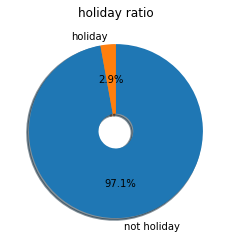

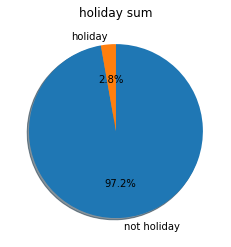

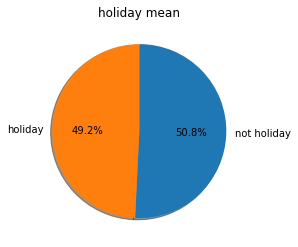

In [18]:
train_df_by_holiday_mean_count_notdf = train_df['count'].groupby(train_df['holiday']).mean()
train_df_by_holiday_mean_count = train_df['count'].groupby(train_df['holiday']).mean().to_frame()
train_df_by_holiday_sum_count_notdf = train_df['count'].groupby(train_df['holiday']).sum()
train_df_by_holiday_sum_count = train_df['count'].groupby(train_df['holiday']).sum().to_frame()
train_df_by_holiday_notdf = train_df['holiday'].groupby(train_df['holiday']).count()
train_df_by_holiday = train_df['holiday'].groupby(train_df['holiday']).count().to_frame()

display(train_df_by_holiday)
display(train_df_by_holiday_mean_count)
display(train_df_by_holiday_sum_count)

import matplotlib.pyplot as plt

labels = ['not holiday', 'holiday']
explode = [0, 0.1]
colors = ['gray', 'red']
wedgeprops = {'width': 0.8, 'linewidth': 2}

plt.title('holiday ratio')
plt.pie(train_df_by_holiday_notdf, labels = labels, 
        autopct='%.1f%%', startangle = 90, counterclock=False, shadow = True, wedgeprops = wedgeprops)
plt.show()

import matplotlib.pyplot as plt

labels = ['not holiday', 'holiday']
explode = [0, 0.1]
colors = ['gray', 'red']
wedgeprops = {'width': 0.8, 'linewidth': 2}

plt.title('holiday sum')
plt.pie(train_df_by_holiday_sum_count_notdf, labels = labels, 
        autopct='%.1f%%', startangle = 90, counterclock=False, shadow = True)
plt.show()

import matplotlib.pyplot as plt

labels = ['not holiday', 'holiday']
explode = [0.05, 0.05]
colors = ['gray', 'red']
wedgeprops = {'width': 0.8, 'linewidth': 2}

plt.title('holiday mean')
plt.pie(train_df_by_holiday_mean_count_notdf, labels = labels, 
        autopct='%.1f%%', startangle = 90, counterclock=False, shadow = True)
plt.show()

In [19]:
# holiday에는 출퇴근 시간대보다 다른 시간대의 대여수가 더 많을 것이다.

train_df_by_holidayhour_mean_count = train_df.groupby(['holiday', 'datetime_hour'])['count'].mean().to_frame()
train_df_by_holidayhour_mean_count_notdf = train_df.groupby(['holiday', 'datetime_hour'])['count'].mean()
train_df_by_workingdayhour_mean_count = train_df.groupby(['workingday', 'datetime_hour'])['count'].mean().to_frame()
train_df_by_workingdayhour_mean_count_notdf = train_df.groupby(['workingday', 'datetime_hour'])['count'].mean()

display(train_df_by_holidayhour_mean_count)
display(train_df_by_workingdayhour_mean_count)

count
holiday datetime_hour            
0       0               54.796380
        1               33.582766
        2               22.747126
        3               11.738717
        4                6.377622
        5               19.961276
        6               77.357466
        7              216.119910
        8              366.703620
        9              222.088235
        10             173.461538
        11             208.787330
        12             254.693002
        13             255.774266
        14             241.164786
        15             253.169300
        16             316.417607
        17             471.722348
        18             433.392777
        19             316.306998
        20             228.792325
        21             173.121896
        22             133.347630
        23              90.009029
1       0               66.769231
        1               43.230769
        2               28.000000
        3               12.416667
        4                7.384615
        5               13.230769
        6               38.923077
        7              111.000000
        8              229.000000
        9              211.307692
        10             230.538462
        11             274.846154
        12             318.384615
        13             326.384615
        14             321.076923
        15             292.769231
        16             314.846154
        17             368.000000
        18             344.538462
        19             280.230769
        20             219.153846
        21             181.846154
        22             141.384615
        23              72.461538

count
workingday datetime_hour            
0          0               94.489655
           1               71.910345
           2               53.748252
           3               25.534722
           4                8.544828
           5                9.373239
           6               19.993103
           7               47.268966
           8              112.255172
           9              177.924138
           10             263.806897
           11             325.386207
           12             379.110345
           13             387.820690
           14             378.731034
           15             373.703448
           16             367.648276
           17             339.124138
           18             292.248276
           19             242.344828
           20             183.806897
           21             148.737931
           22             123.351724
           23              90.606897
1          0               36.732258
           1               16.003236
           2                8.436066
           3                4.892734
           4                5.363636
           5               24.529032
           6              102.577419
           7              290.690323
           8              479.945161
           9              242.293548
           10             133.596774
           11             157.019355
           12             199.347267
           13             197.160772
           14             180.366559
           15             198.627010
           16             292.466238
           17             529.209003
           18             495.485531
           19             349.282958
           20             249.363344
           21             184.855305
           22             138.344051
           23              88.996785

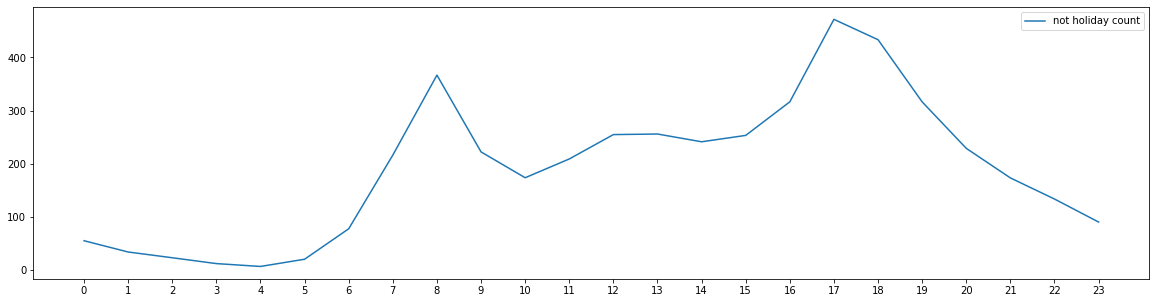

In [20]:
train_df_by_holidayhour_mean_count['count'][1] # 현재 공부 중입니다!!!

import matplotlib.pyplot as plt

line1 = train_df_by_holidayhour_mean_count['count'][0]
line2 = train_df_by_holidayhour_mean_count['count'][1]
line3 = train_df_by_workingdayhour_mean_count['count'][0]
line4 = train_df_by_workingdayhour_mean_count['count'][1]

plt.figure(figsize = (20 ,5))
plt.plot(line1, label = 'not holiday count')
plt.xticks(range(24), range(24))
plt.legend()
plt.show()

# 평시간대에도 자전거 대여수가 많다.

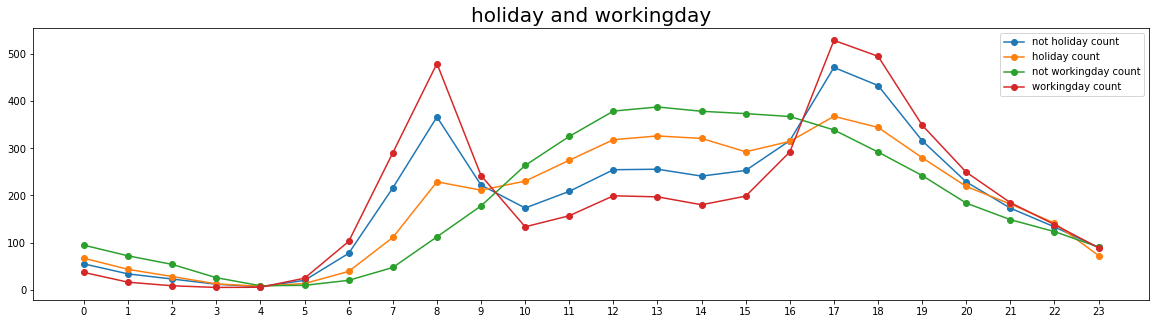

In [21]:
train_df_by_holidayhour_mean_count['count'][1] # 현재 공부 중입니다!!!

import matplotlib.pyplot as plt

line1 = train_df_by_holidayhour_mean_count['count'][0]
line2 = train_df_by_holidayhour_mean_count['count'][1]
line3 = train_df_by_workingdayhour_mean_count['count'][0]
line4 = train_df_by_workingdayhour_mean_count['count'][1]

fig = plt.figure(figsize = (20, 5)) # 캔버스 생성
# fig.set_facecolor('white') # 캔버스 색상 설정
ax = fig.add_subplot() # 그림 뼈대(프레임) 생성
 
ax.plot(line1, marker='o',label='not holiday count') # 선그래프 생성
ax.plot(line2, marker='o',label='holiday count') 
ax.plot(line3, marker='o',label='not workingday count') 
ax.plot(line4, marker='o',label='workingday count') 

plt.xticks(range(24), range(24))
ax.legend() # 범례
 
plt.title('holiday and workingday',fontsize=20) # 타이틀 설정
plt.show()

# holiday, not workingday에는 평시간대에도 자전거 대여수가 많다.
# 공유 자전거를 이용하는 이유는 무엇일까? 운동, 약속장소로의 이동 등이 있을 것으로 예상된다.

,workingday
workingday,
0,3474
1,7412


,count
workingday,
0,188.506621
1,193.011873


,count
workingday,
0,654872
1,1430604


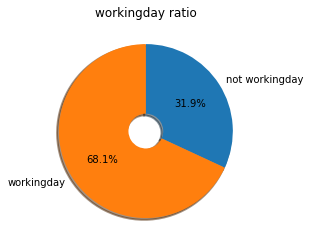

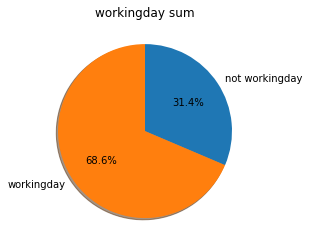

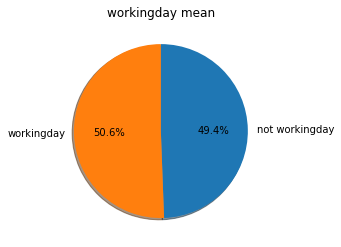

In [22]:
train_df_by_workingday_mean_count_notdf = train_df['count'].groupby(train_df['workingday']).mean()
train_df_by_workingday_mean_count = train_df['count'].groupby(train_df['workingday']).mean().to_frame()
train_df_by_workingday_sum_count_notdf = train_df['count'].groupby(train_df['workingday']).sum()
train_df_by_workingday_sum_count = train_df['count'].groupby(train_df['workingday']).sum().to_frame()
train_df_by_workingday_notdf = train_df['workingday'].groupby(train_df['workingday']).count()
train_df_by_workingday = train_df['workingday'].groupby(train_df['workingday']).count().to_frame()

display(train_df_by_workingday)
display(train_df_by_workingday_mean_count)
display(train_df_by_workingday_sum_count)

import matplotlib.pyplot as plt

labels = ['not workingday', 'workingday']
explode = [0, 0.1]
colors = ['gray', 'red']
wedgeprops = {'width': 0.8, 'linewidth': 2}

plt.title('workingday ratio')
plt.pie(train_df_by_workingday_notdf, labels = labels, 
        autopct='%.1f%%', startangle = 90, counterclock=False, shadow = True, wedgeprops = wedgeprops)
plt.show()

import matplotlib.pyplot as plt

labels = ['not workingday', 'workingday']
explode = [0, 0.1]
colors = ['gray', 'red']
wedgeprops = {'width': 0.8, 'linewidth': 2}

plt.title('workingday sum')
plt.pie(train_df_by_workingday_sum_count_notdf, labels = labels, 
        autopct='%.1f%%', startangle = 90, counterclock=False, shadow = True)
plt.show()

import matplotlib.pyplot as plt

labels = ['not workingday', 'workingday']
explode = [0.05, 0.05]
colors = ['gray', 'red']
wedgeprops = {'width': 0.8, 'linewidth': 2}

plt.title('workingday mean')
plt.pie(train_df_by_workingday_mean_count_notdf, labels = labels, 
        autopct='%.1f%%', startangle = 90, counterclock=False, shadow = True)
plt.show()

count
workingday commute_time            
0          0             188.506621
1          0             141.495462
           1             448.934783

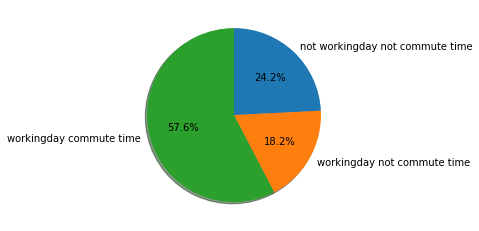

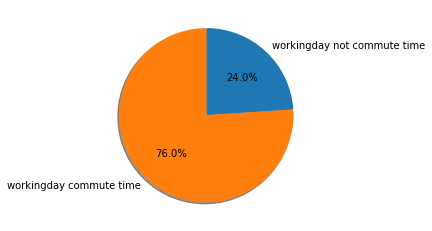

In [23]:
train_df_by_workingday_commute_mean_count = train_df.groupby(['workingday', 'commute_time'])['count'].mean().to_frame()
train_df_by_workingday_commute_mean_count_notdf = train_df.groupby(['workingday', 'commute_time'])['count'].mean()

display(train_df_by_workingday_commute_mean_count)

import matplotlib.pyplot as plt

labels = ['not workingday not commute time', 'workingday not commute time', 'workingday commute time']
explode = [0.05, 0.05]
colors = ['gray', 'red']
wedgeprops = {'width': 0.8, 'linewidth': 2}

plt.pie(train_df_by_workingday_commute_mean_count_notdf, labels = labels, 
        autopct='%.1f%%', startangle = 90, counterclock=False, shadow = True)
plt.show()

import matplotlib.pyplot as plt

labels = ['workingday not commute time', 'workingday commute time']
# labels = train_df_by_workingday_commute_mean_count_notdf.index[0:2]
explode = [0.05, 0.05]
colors = ['gray', 'red']
wedgeprops = {'width': 0.8, 'linewidth': 2}

plt.pie(train_df_by_workingday_commute_mean_count_notdf[1:], labels = labels,
        autopct='%.1f%%', startangle = 90, counterclock=False, shadow = True)
plt.show()

In [24]:
# weekday workingday 양상이 비슷하다.
# 출퇴근할 때 날씨가 좋으면 수요가 많을 것으로 예상된다.

train_df_by_workingday_commute_wt_mean_count = train_df.groupby(['workingday', 'commute_time', 'weather'])['count'].mean().to_frame()
train_df_by_workingday_commute_wt_mean_count_notdf = train_df.groupby(['workingday', 'commute_time', 'weather'])['count'].mean()

display(train_df_by_workingday_commute_wt_mean_count)

count
workingday commute_time weather            
0          0            1        203.345941
                        2        166.529543
                        3        120.633929
1          0            1        151.853465
                        2        135.478422
                        3         78.332677
           1            1        480.728411
                        2        438.212698
                        3        277.748031
                        4        164.000000

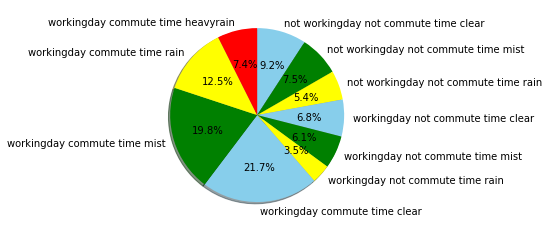

In [25]:
import matplotlib.pyplot as plt

labels = ['not workingday not commute time clear', 'not workingday not commute time mist', 'not workingday not commute time rain', 
          'workingday not commute time clear', 'workingday not commute time mist', 'workingday not commute time rain', 
          'workingday commute time clear', 'workingday commute time mist', 'workingday commute time rain', 'workingday commute time heavyrain']
explode = [0.05, 0.05]
colors = ['skyblue', 'green', 'yellow', 'skyblue', 'green', 'yellow', 'skyblue', 'green', 'yellow','red']
wedgeprops = {'width': 0.8, 'linewidth': 2}

plt.pie(train_df_by_workingday_commute_wt_mean_count_notdf, labels = labels, 
        autopct='%.1f%%', startangle = 90, counterclock=False, shadow = True, colors = colors)
plt.show()
# 강한 비에 자전거는 왜 타는 것인가? 출퇴근을 위해서로 추정된다. 출퇴근 시간을 제외하면 강한 비에 자전거 대여수는 0이다.

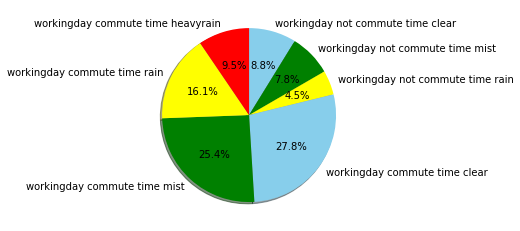

In [26]:
import matplotlib.pyplot as plt

labels = ['workingday not commute time clear', 'workingday not commute time mist', 'workingday not commute time rain', 
          'workingday commute time clear', 'workingday commute time mist', 
          'workingday commute time rain', 'workingday commute time heavyrain']
# labels = train_df_by_workingday_commute_mean_count_notdf.index[0:2]
explode = [0.05, 0.05]
colors = [ 'skyblue', 'green', 'yellow', 'skyblue', 'green', 'yellow','red']
wedgeprops = {'width': 0.8, 'linewidth': 2}

plt.pie(train_df_by_workingday_commute_wt_mean_count_notdf[3:], labels = labels,
        autopct='%.1f%%', startangle = 90, counterclock=False, shadow = True, colors = colors)
plt.show()
# 날씨가 보통이거나 좋을 때 대여수가 많지만, 출퇴근 시간에서는 매우 안좋은 날씨에도 불구하고 대여가 존재한다.

In [27]:
# 날씨가 좋으면 많이 탈 것이다.

In [28]:
target=train_df['count']

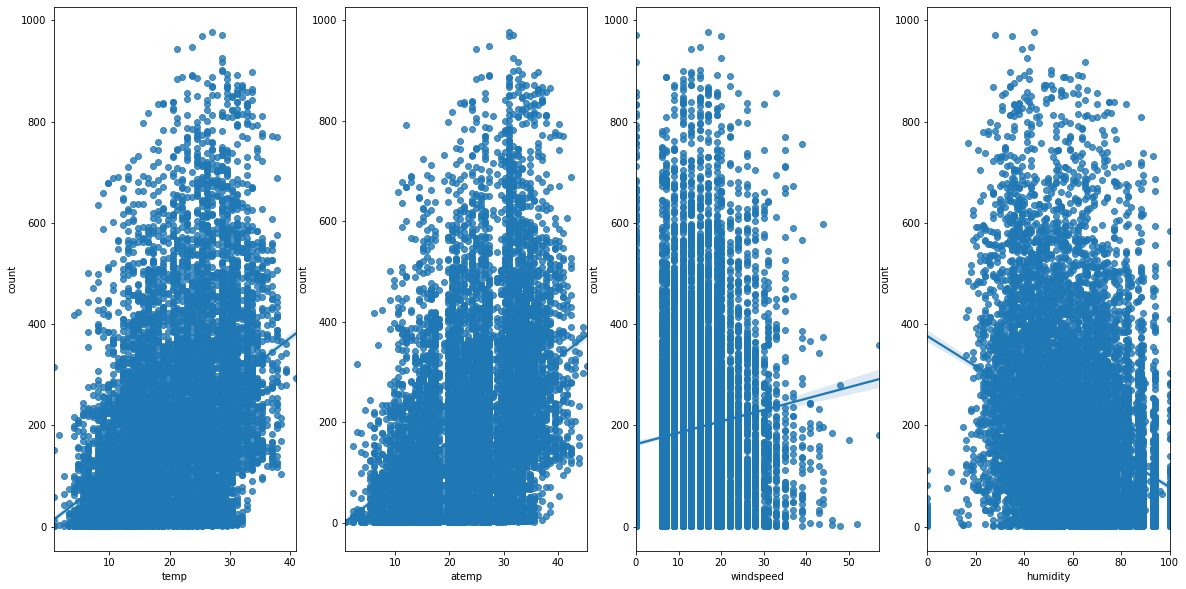

In [29]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
fig.set_size_inches(20, 10)
sns.regplot(x="temp", y="count", data=train_df,ax=ax1)
sns.regplot(x="atemp", y="count", data=train_df,ax=ax2)
sns.regplot(x="windspeed", y="count", data=train_df,ax=ax3)
sns.regplot(x="humidity", y="count", data=train_df,ax=ax4)

In [30]:
feature=list(test_df)
train_sub=train_df[feature]
combine_df=pd.concat((train_sub,test_df))

#windspeed
combine_df.loc[combine_df['windspeed']==0,'windspeed']=combine_df['windspeed'].mean()

combine_df['windspeed'].plot(kind='hist',bins=10, color='skyblue')
plt.style.use('ggplot') 
plt.rcParams["figure.figsize"] = (14,4) 
plt.rcParams["font.size"]=15 
plt.title('Histogram')
plt.xlabel('windspeed') 
plt.show()


combine_df['temp'].plot(kind='hist',bins=10, color='skyblue')
plt.style.use('ggplot') 
plt.rcParams["figure.figsize"] = (14,4) 
plt.rcParams["font.size"]=15 
plt.title('Histogram')
plt.xlabel('temp') 
plt.show()

combine_df['atemp'].plot(kind = 'hist', bins = 10, color = 'skyblue')
plt.style.use('ggplot') 
plt.rcParams["figure.figsize"] = (14,4) 
plt.rcParams["font.size"] = 15 
plt.title('Histogram')
plt.xlabel('atemp') 
plt.show()

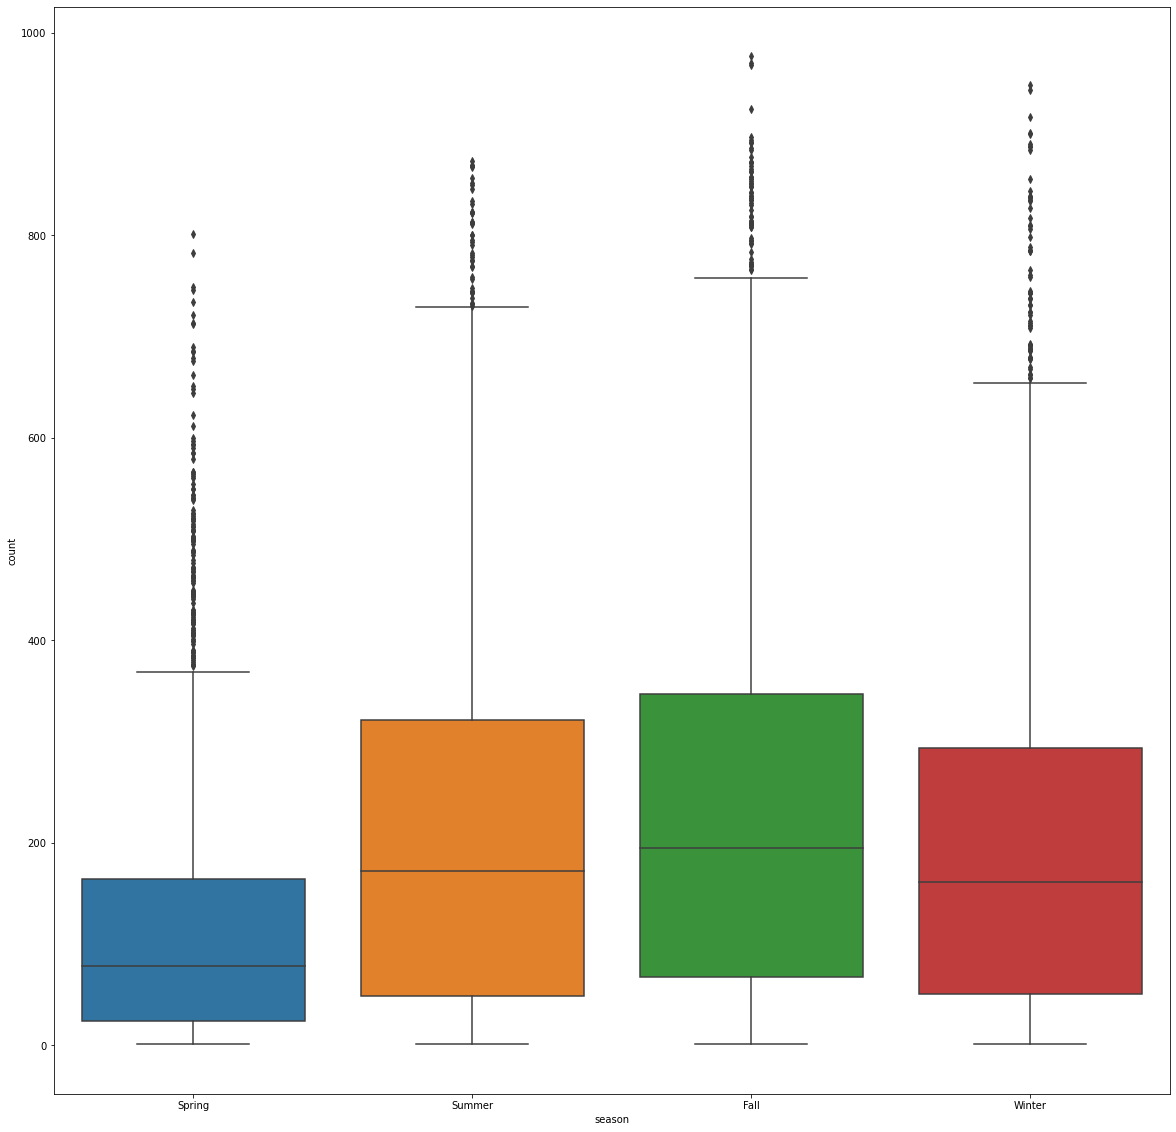

In [31]:
fig1, ax = plt.subplots(figsize=(20,20))

sns.boxplot(data=train_df, x='season', y='count')

ax.set(xticklabels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

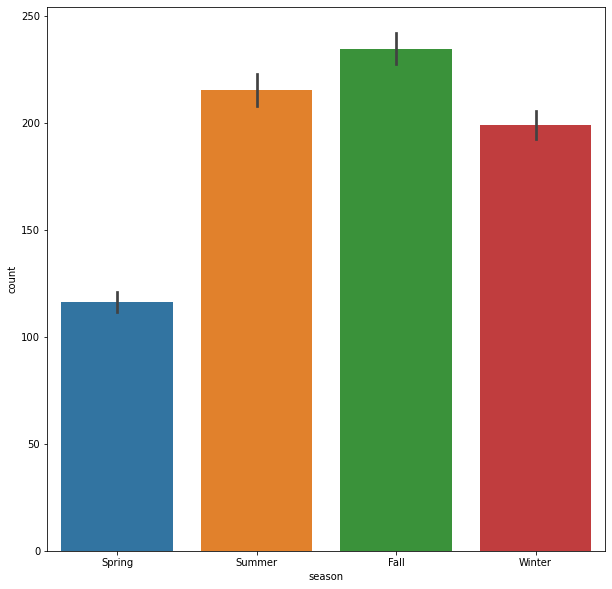

In [32]:
fig1, ax = plt.subplots(figsize=(10,10))

sns.barplot(data=train_df, x='season', y='count')

ax.set(xticklabels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

In [33]:
train_df.groupby('season').mean()[['count']]

,count
season,
1,116.343261
2,215.251372
3,234.417124
4,198.988296


fig1, ax = plt.subplots(figsize=(20,20))

sns.boxplot(data=train_df, x = 'season', y = 'atemp')

ax.set(xticklabels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(20, 10)
sns.regplot(x="atemp", y="windspeed", data=train_df,ax=ax1)
sns.regplot(x="atemp", y="humidity", data=train_df,ax=ax2)
sns.regplot(x="atemp", y="season", data=train_df,ax=ax3)

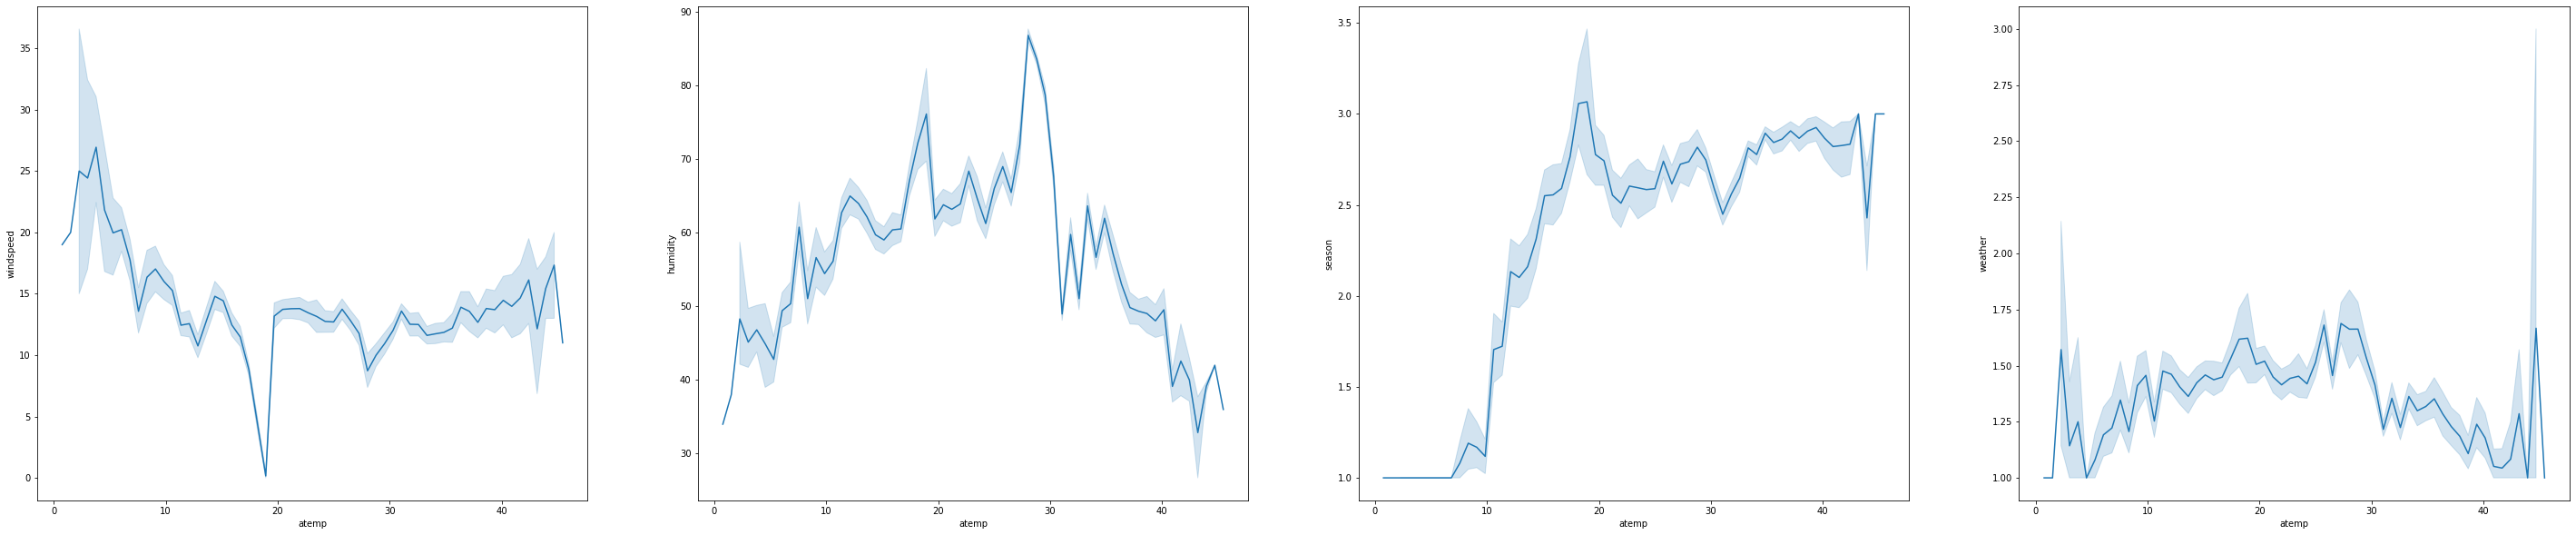

In [34]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
fig.set_size_inches(50, 10)
sns.lineplot(x="atemp", y="windspeed", data=train_df,ax=ax1)
sns.lineplot(x="atemp", y="humidity", data=train_df,ax=ax2)
sns.lineplot(x="atemp", y="season", data=train_df,ax=ax3)
sns.lineplot(x="atemp", y="weather", data=train_df,ax=ax4)

In [35]:
#season, weather 산점도
#season, windspeed 

사용하지 않은 feature drop
casual, registered는 drop 시킬 것임
temp와 atemp 중 한 속성만 사용
=> 분산이 크므로 더 고르게 분포해서 그래프의 연관성 파악이 쉽다고 생각함
feature engineering
windspeed 0인 부분 전처리
이상치 제거
humidity 0인 부분??

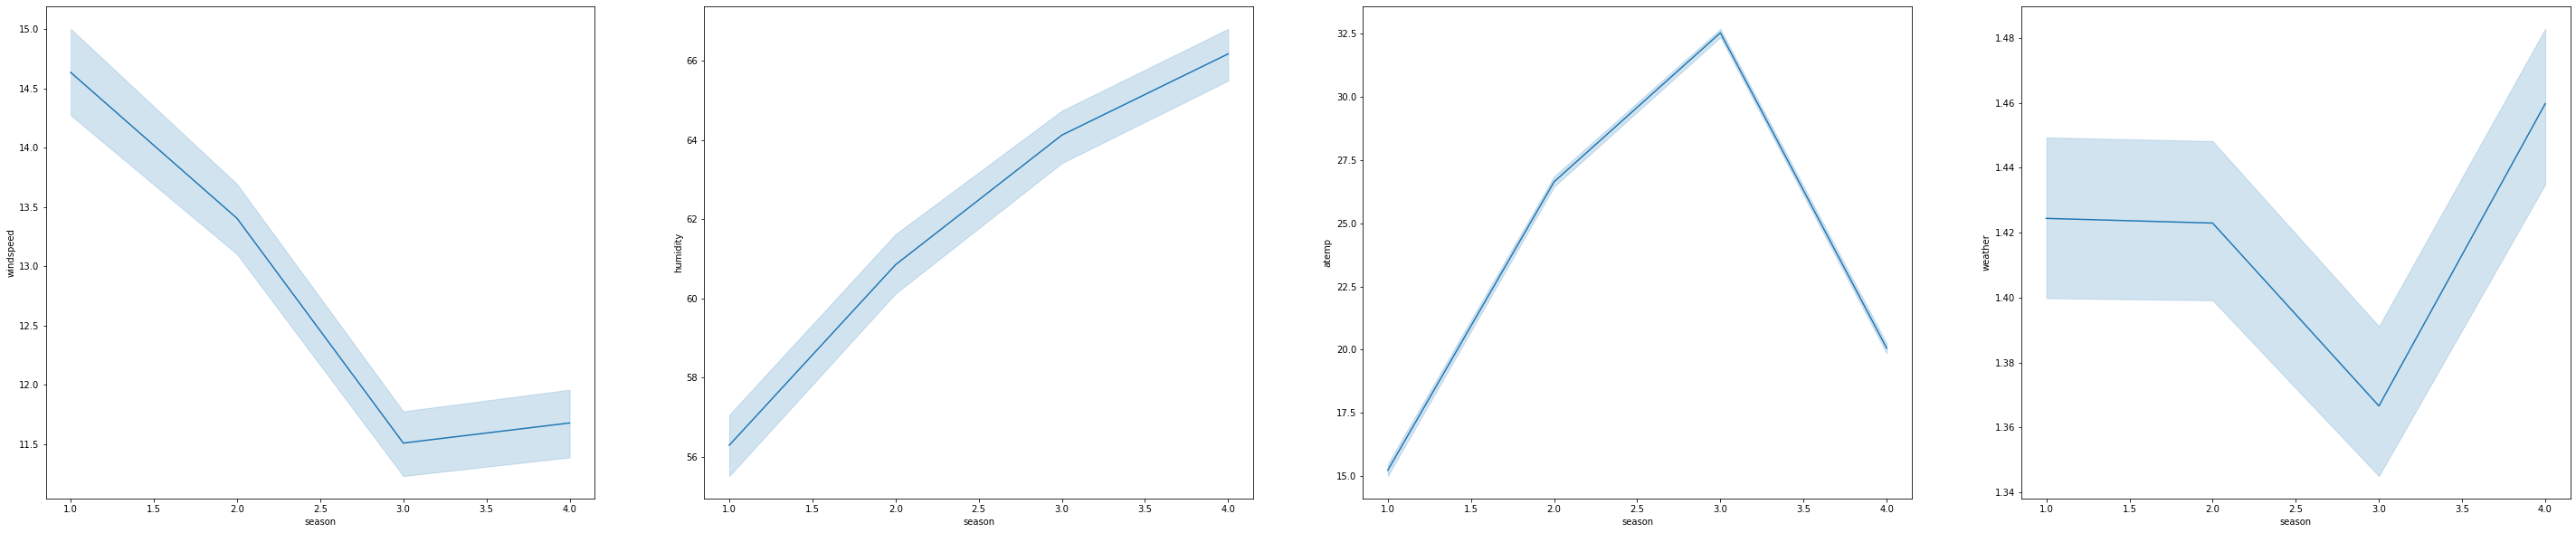

In [36]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
fig.set_size_inches(50, 10)
sns.lineplot(x="season", y="windspeed", data=train_df,ax=ax1)
sns.lineplot(x="season", y="humidity", data=train_df,ax=ax2)
sns.lineplot(x="season", y="atemp", data=train_df,ax=ax3)
sns.lineplot(x="season", y="weather", data=train_df,ax=ax4)

# 이상치 제거

{'whiskers': [<matplotlib.lines.Line2D at 0x22995b1e940>,
 'caps': [<matplotlib.lines.Line2D at 0x22995b1b040>,
 'boxes': [<matplotlib.lines.Line2D at 0x22995b1e5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x22995b1b700>],
 'fliers': [<matplotlib.lines.Line2D at 0x22995b1ba00>],
 'means': []}

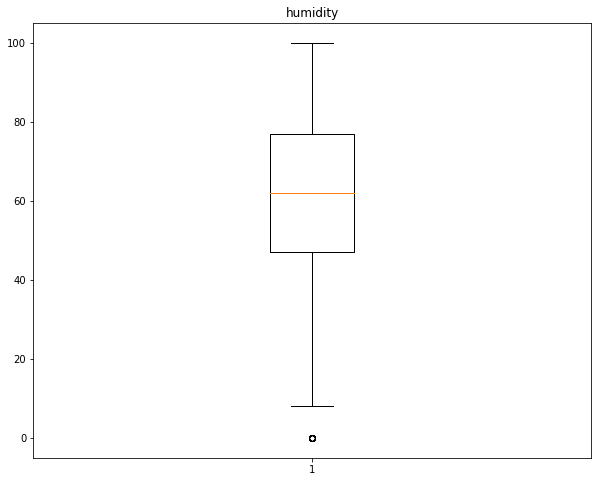

In [37]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.title('humidity')
ax.boxplot(train_df['humidity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2299458ae50>,
 'caps': [<matplotlib.lines.Line2D at 0x22994576550>,
 'boxes': [<matplotlib.lines.Line2D at 0x2299458aaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x22994576c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x22994576f10>],
 'means': []}

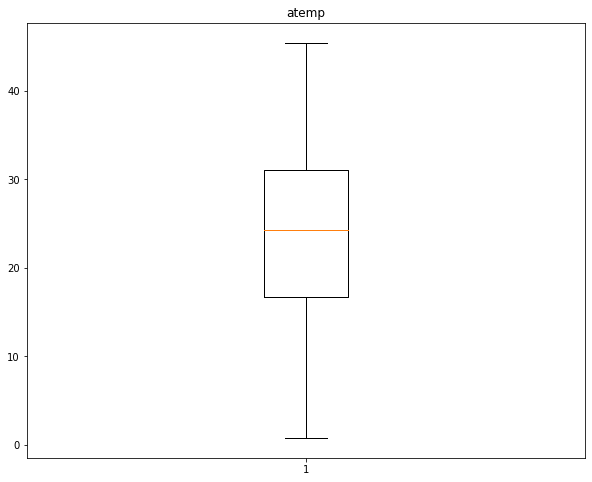

In [38]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.title('atemp')
ax.boxplot(train_df['atemp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22994653df0>,
 'caps': [<matplotlib.lines.Line2D at 0x2299465f4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22994653a90>],
 'medians': [<matplotlib.lines.Line2D at 0x2299465fbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2299465feb0>],
 'means': []}

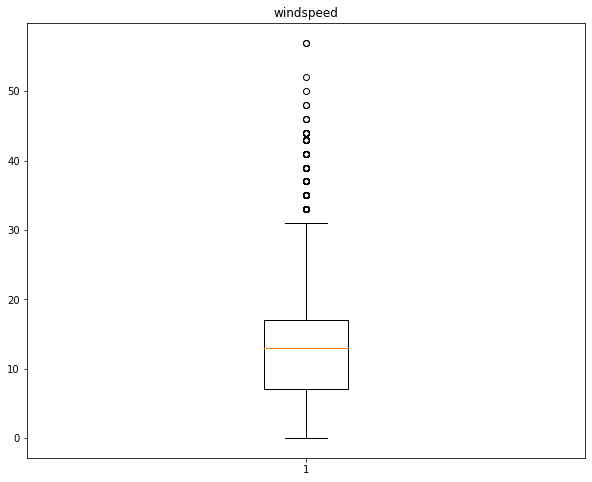

In [39]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.title('windspeed')
ax.boxplot(train_df['windspeed'])

In [40]:
train_df['humidity'].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

In [41]:
train_df['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [42]:
train_df.loc[train_df['humidity']<2,'humidity']=train_df['humidity'].mean()

In [43]:
train_df.loc[train_df['windspeed']>29.5,'windspeed']=train_df['windspeed'].mean()

{'whiskers': [<matplotlib.lines.Line2D at 0x229947d57f0>,
 'caps': [<matplotlib.lines.Line2D at 0x229947d5eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x229947d5490>],
 'medians': [<matplotlib.lines.Line2D at 0x229947e05b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x229947e08b0>],
 'means': []}

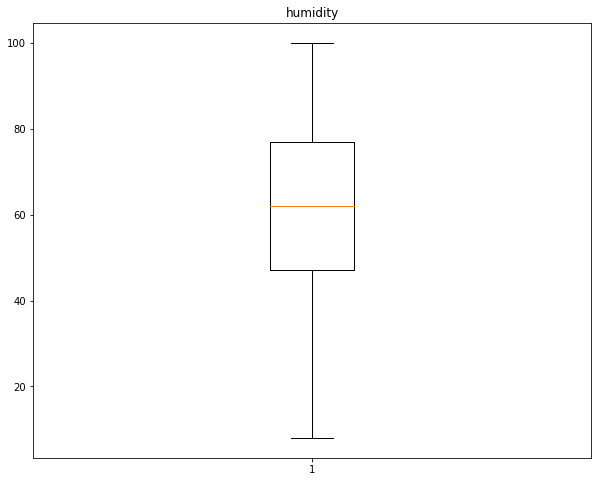

In [44]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.title('humidity')
ax.boxplot(train_df['humidity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22994a897c0>,
 'caps': [<matplotlib.lines.Line2D at 0x22994a89e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x22994a89430>],
 'medians': [<matplotlib.lines.Line2D at 0x22994a96580>],
 'fliers': [<matplotlib.lines.Line2D at 0x22994a96880>],
 'means': []}

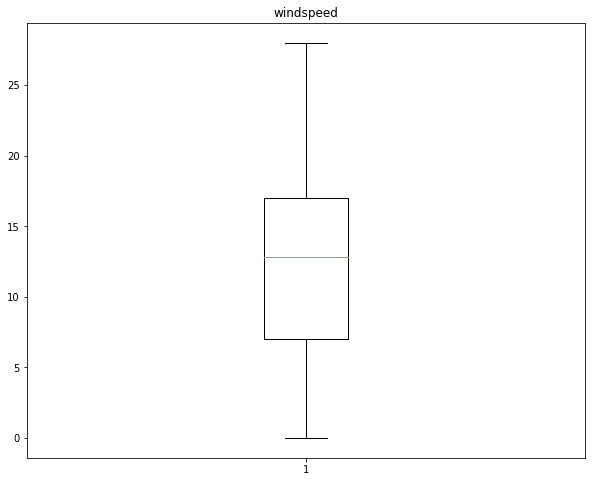

In [45]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.title('windspeed')
ax.boxplot(train_df['windspeed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22994addd00>,
 'caps': [<matplotlib.lines.Line2D at 0x22994aea400>,
 'boxes': [<matplotlib.lines.Line2D at 0x22994add9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x22994aeaac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22994aeadc0>],
 'means': []}

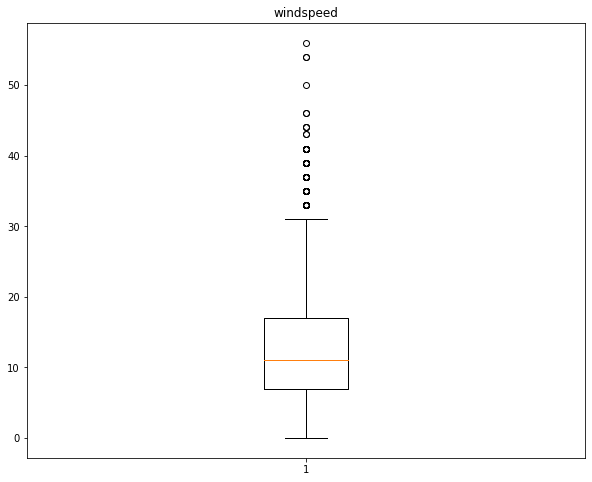

In [46]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.title('windspeed')
ax.boxplot(test_df['windspeed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22994319340>,
 'caps': [<matplotlib.lines.Line2D at 0x22994445130>,
 'boxes': [<matplotlib.lines.Line2D at 0x229942f93d0>],
 'medians': [<matplotlib.lines.Line2D at 0x229943f6250>],
 'fliers': [<matplotlib.lines.Line2D at 0x22993a0df70>],
 'means': []}

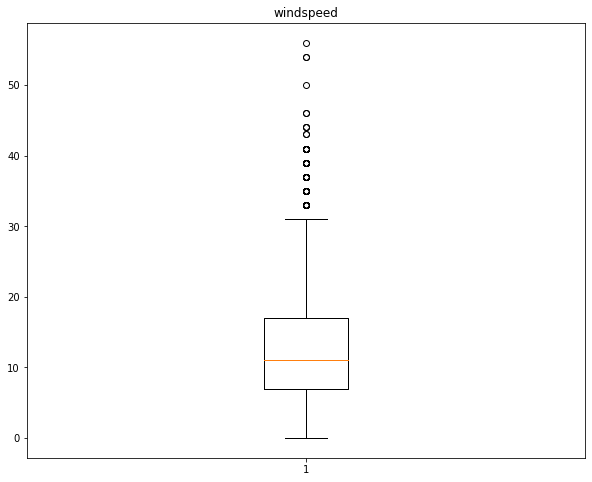

In [47]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.title('windspeed')
ax.boxplot(test_df['windspeed'])

In [48]:
test_df['windspeed'].describe()

count    6493.000000
mean       12.631157
std         8.250151
min         0.000000
25%         7.001500
50%        11.001400
75%        16.997900
max        55.998600
Name: windspeed, dtype: float64

In [49]:
test_df.loc[test_df['windspeed']>29.5,'windspeed']=test_df['windspeed'].mean()

{'whiskers': [<matplotlib.lines.Line2D at 0x229941c4670>,
 'caps': [<matplotlib.lines.Line2D at 0x229941c4c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2299462bcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x229946838e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x229947f3730>],
 'means': []}

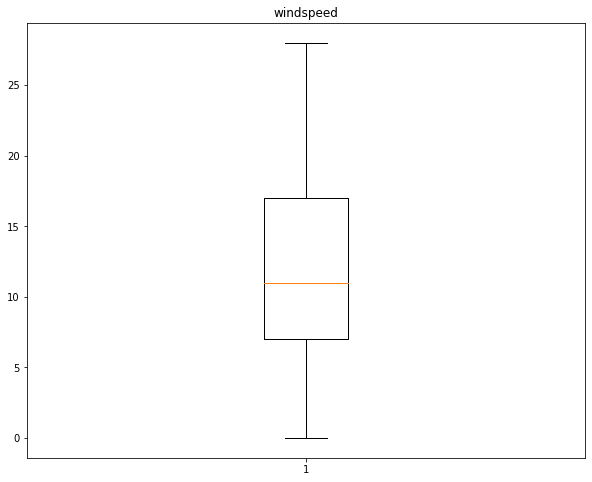

In [50]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.title('windspeed')
ax.boxplot(test_df['windspeed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2299610e130>,
 'caps': [<matplotlib.lines.Line2D at 0x2299610e7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22996100d90>],
 'medians': [<matplotlib.lines.Line2D at 0x2299610eeb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x229961191f0>],
 'means': []}

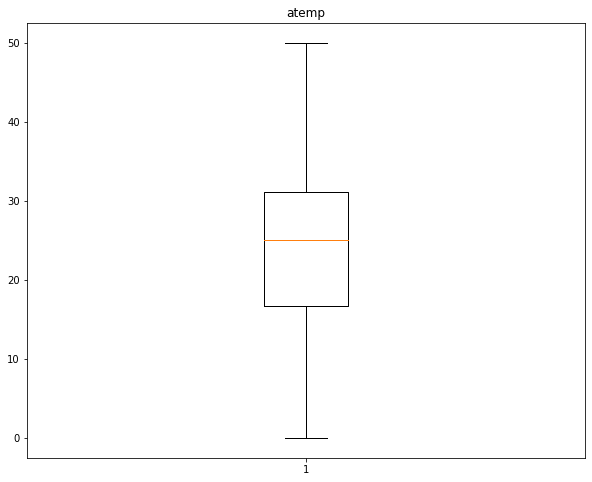

In [51]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.title('atemp')
ax.boxplot(test_df['atemp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22996434670>,
 'caps': [<matplotlib.lines.Line2D at 0x22996434d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x22996434310>],
 'medians': [<matplotlib.lines.Line2D at 0x2299643c430>],
 'fliers': [<matplotlib.lines.Line2D at 0x2299643c730>],
 'means': []}

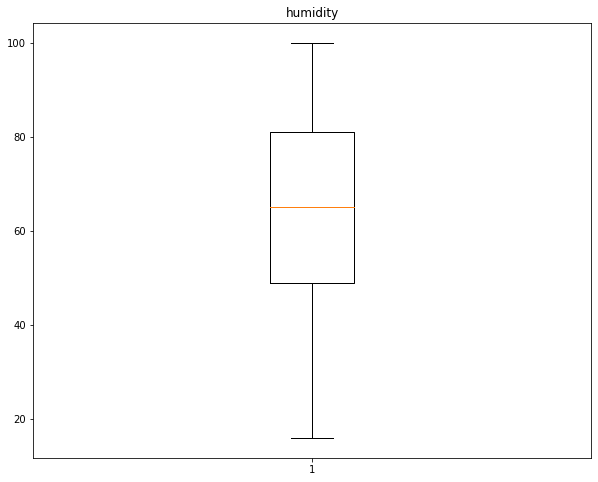

In [52]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.title('humidity')
ax.boxplot(test_df['humidity'])

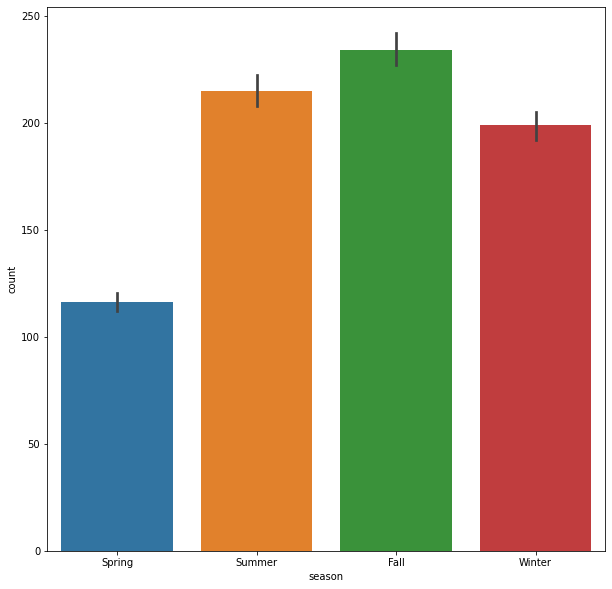

In [53]:
fig1, ax = plt.subplots(figsize=(10,10))

sns.barplot(data=train_df, x='season', y='count')

ax.set(xticklabels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

In [54]:
train_df.groupby('season').mean()[['count']]

,count
season,
1,116.343261
2,215.251372
3,234.417124
4,198.988296


In [56]:
test_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dayofweek,datetime_date,datetime_month,datetime_hour,weekend,weekday,commute_time,atempCategory
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,3,2011-01-20,1,0,0,1,0,2
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,3,2011-01-20,1,1,0,1,0,2
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,3,2011-01-20,1,2,0,1,0,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,2011-01-20,1,3,0,1,0,2
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,2011-01-20,1,4,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,2012-12-31,12,19,0,1,0,2
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,2012-12-31,12,20,0,1,0,2
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,0,2012-12-31,12,21,0,1,0,2
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,0,2012-12-31,12,22,0,1,0,2


In [57]:
new_train_df = train_df.drop(['datetime', 'temp', 'casual', 'registered', 'datetime_date', 'datetime_month', 
               'weekend', 'weekday', 'tempCategory'], axis = 1)

In [58]:
new_train_df.isnull().sum()

season           0
holiday          0
workingday       0
weather          0
atemp            0
humidity         0
windspeed        0
count            0
dayofweek        0
datetime_hour    0
commute_time     0
atempCategory    0
dtype: int64

In [59]:
new_train_df.describe()

,season,holiday,workingday,weather,atemp,humidity,windspeed,count,dayofweek,datetime_hour,commute_time
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,23.655084,62.011529,11.979094,191.574132,3.013963,11.541613,0.114091
std,1.116174,0.166599,0.466159,0.633839,8.474601,19.042449,6.932941,181.144454,2.004585,6.915838,0.317937
min,1.000000,0.000000,0.000000,1.000000,0.760000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,16.665000,47.000000,7.001500,42.000000,1.000000,6.000000,0.000000
50%,3.000000,0.000000,1.000000,1.000000,24.240000,62.000000,12.799395,145.000000,3.000000,12.000000,0.000000
75%,4.000000,0.000000,1.000000,2.000000,31.060000,77.000000,16.997900,284.000000,5.000000,18.000000,0.000000
max,4.000000,1.000000,1.000000,4.000000,45.455000,100.000000,27.999300,977.000000,6.000000,23.000000,1.000000


bins_h = list(range(0, 105, 5))
bins_w = list(range(0, 65, 5))

bins_labelmap_h = list(range(0, 21, 1))
bins_labelmap_w = list(range(0, 13, 1))

new_train_df['humidityCategory'] = pd.cut(new_train_df['humidity'], bins_h, right = False, labels = bins_labelmap_h[:-1])
new_train_df['windspeedCategory'] = pd.cut(new_train_df['windspeed'], bins_w, right = False, labels = bins_labelmap_w[:-1])

In [60]:
bins_h = list(range(0, 110, 5))
bins_w = list(range(0, 70, 5))

bins_labelmap_h = list(range(0, 22, 1))
bins_labelmap_w = list(range(0, 14, 1))

new_train_df['humidityCategory'] = pd.cut(new_train_df['humidity'], bins_h, right = False, labels = bins_labelmap_h[:-1])
new_train_df['windspeedCategory'] = pd.cut(new_train_df['windspeed'], bins_w, right = False, labels = bins_labelmap_w[:-1])
test_df['humidityCategory'] = pd.cut(test_df['humidity'], bins_h, right = False, labels = bins_labelmap_h[:-1])
test_df['windspeedCategory'] = pd.cut(test_df['windspeed'], bins_w, right = False, labels = bins_labelmap_w[:-1])

In [61]:
new_train_df.isnull().sum()

season               0
holiday              0
workingday           0
weather              0
atemp                0
humidity             0
windspeed            0
count                0
dayofweek            0
datetime_hour        0
commute_time         0
atempCategory        0
humidityCategory     0
windspeedCategory    0
dtype: int64

In [62]:
final_train_df = new_train_df.drop(['atemp', 'humidity', 'windspeed'], axis = 1)

In [63]:
final_train_df

,season,holiday,workingday,weather,count,dayofweek,datetime_hour,commute_time,atempCategory,humidityCategory,windspeedCategory
0,1,0,0,1,16,5,0,0,2,16,0
1,1,0,0,1,40,5,1,0,2,16,0
2,1,0,0,1,32,5,2,0,2,16,0
3,1,0,0,1,13,5,3,0,2,15,0
4,1,0,0,1,1,5,4,0,2,15,0
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,336,2,19,0,3,10,5
10882,4,0,1,1,241,2,20,0,3,11,3
10883,4,0,1,1,168,2,21,0,3,12,3
10884,4,0,1,1,129,2,22,0,3,12,1


In [64]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   season             10886 non-null  int64   
 1   holiday            10886 non-null  int64   
 2   workingday         10886 non-null  int64   
 3   weather            10886 non-null  int64   
 4   count              10886 non-null  int64   
 5   dayofweek          10886 non-null  int64   
 6   datetime_hour      10886 non-null  int64   
 7   commute_time       10886 non-null  int32   
 8   atempCategory      10886 non-null  category
 9   humidityCategory   10886 non-null  category
 10  windspeedCategory  10886 non-null  category
dtypes: category(3), int32(1), int64(7)
memory usage: 671.8 KB


In [65]:
final_train_df.isnull().sum()

season               0
holiday              0
workingday           0
weather              0
count                0
dayofweek            0
datetime_hour        0
commute_time         0
atempCategory        0
humidityCategory     0
windspeedCategory    0
dtype: int64

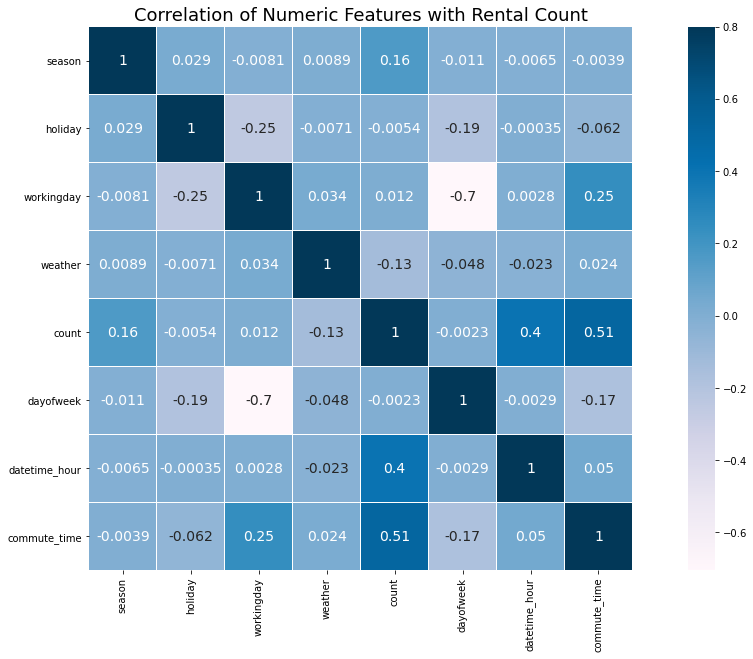

In [66]:
hitmap_data = final_train_df[['season','holiday','workingday','weather',  'count', 'dayofweek', 'datetime_hour','commute_time', 'atempCategory', 'humidityCategory', 'windspeedCategory']] 
colormap = plt.cm.PuBu
f , ax = plt.subplots(figsize = (20,10)) 

plt.title('Correlation of Numeric Features with Rental Count',y=1,size=18) 
sns.heatmap(hitmap_data.corr(), vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap, linecolor="white",annot_kws = {'size':14})


#  사용하지 않은 feature drop
casual, registered는 drop 시킬 것임
temp와 atemp 중 한 속성만 사용
=> 분산이 크므로 더 고르게 분포해서 그래프의 연관성 파악이 쉽다고 생각함

# feature engineering
windspeed 0인 부분 전처리
이상치 제거
humidity 0인 부분??

# 공공자전거 
* 회귀분석에 해당 (supervised learning/지도학습)
* 알고리즘=> sgd regreesor, lasso, linear regression, ridge regression 등등등

# RMSLE
과대평가 된 항목보다는 과소평가 된 항목에 패널티를 준다. 오차를 제곱해서 평균한 값의 제곱근으로 값이 작을 수록 정밀도가 높다. 0에
가까운 값이 나올 수록 정밀도가 높은 값이다. 

In [67]:
from sklearn.metrics import make_scorer
 
def RMSLE(predicted_values, actual_values):
    
    # 예측값과 실제 값을 numpy 배열 형태로 변환
    predicted_values = np.array(final_train_df)
    actual_values = np.array(test_df)
    
    # 예측값과 실제 값에 1을 더하고 로그 변환 
    log_predict = np.log(final_train_df + 1)
    log_actual = np.log(test_df+ 1)
    
    # 로그 변환한 예측값에서 로그 변환한 실제 값을 빼고 제곱
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 위에서 계산한 값의 평균
    mean_difference = difference.mean()
    
    # 위에서 계산한 값에 루트
    score = np.sqrt(mean_difference)
    
    return score
 
rmsle_scorer = make_scorer(RMSLE)
rmsle_scorer

make_scorer(RMSLE)

In [68]:
final_train_df

,season,holiday,workingday,weather,count,dayofweek,datetime_hour,commute_time,atempCategory,humidityCategory,windspeedCategory
0,1,0,0,1,16,5,0,0,2,16,0
1,1,0,0,1,40,5,1,0,2,16,0
2,1,0,0,1,32,5,2,0,2,16,0
3,1,0,0,1,13,5,3,0,2,15,0
4,1,0,0,1,1,5,4,0,2,15,0
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,336,2,19,0,3,10,5
10882,4,0,1,1,241,2,20,0,3,11,3
10883,4,0,1,1,168,2,21,0,3,12,3
10884,4,0,1,1,129,2,22,0,3,12,1


In [69]:
test_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dayofweek,datetime_date,datetime_month,datetime_hour,weekend,weekday,commute_time,atempCategory,humidityCategory,windspeedCategory
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,3,2011-01-20,1,0,0,1,0,2,11,5
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,3,2011-01-20,1,1,0,1,0,2,11,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,3,2011-01-20,1,2,0,1,0,2,11,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,2011-01-20,1,3,0,1,0,2,11,2
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,2011-01-20,1,4,0,1,0,2,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,2012-12-31,12,19,0,1,0,2,12,2
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,2012-12-31,12,20,0,1,0,2,12,2
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,0,2012-12-31,12,21,0,1,0,2,12,2
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,0,2012-12-31,12,22,0,1,0,2,11,1


In [70]:
test_df = test_df.drop(['datetime_month'], axis = 1)

In [71]:
test_df = test_df.drop(['datetime','temp','atemp', 'humidity', 'windspeed'], axis = 1)

In [72]:
test_df = test_df.drop(['datetime_date'], axis = 1)

In [73]:
test_df = test_df.drop(['weekend','weekday'], axis = 1)

In [74]:
from sklearn.ensemble import RandomForestClassifier
feature_names=['season','holiday','workingday','weather','dayofweek','datetime_hour','commute_time',
               'atempCategory','humidityCategory','windspeedCategory']
x_train=final_train_df[feature_names]
y_train=final_train_df['count']
x_test=test_df[feature_names]
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [75]:
x_train.shape

(10886, 10)

In [76]:
y_train.shape
y_train.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [ ]:
x_test.shape

# Cross Validation 교차 검증
일반화 성능을 측정하기 위해 데이터를 여러번 반복해서 나누고 여러 모델을 학습한다.

In [77]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10, shuffle=True, random_state=42)

In [78]:
from sklearn.ensemble import RandomForestRegressor
max_depth_list=[]
model=RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=42)
model

RandomForestRegressor(n_jobs=-1, random_state=42)

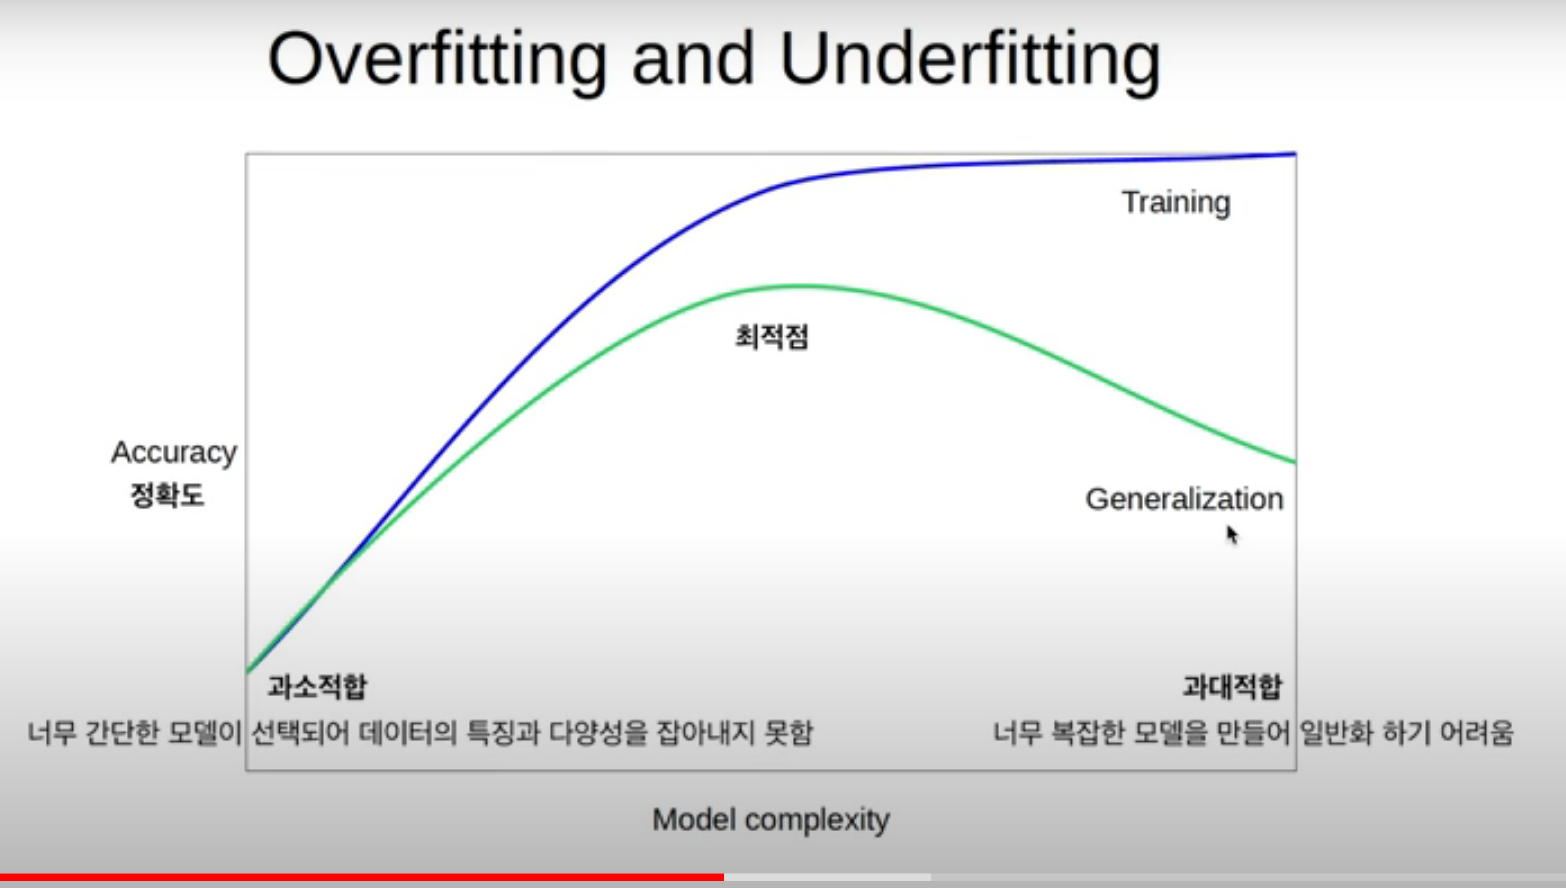

In [79]:
model.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [84]:
predictions=model.predict(x_test)
predictions.shape

(6493,)

In [94]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train, y_train)
p_preds=lr.predict(x_test)
p_preds.shape

(6493,)

In [95]:
submission['count']=p_preds

In [96]:
submission

,datetime,count
0,2011-01-20 00:00:00,-24.734163
1,2011-01-20 01:00:00,-25.638649
2,2011-01-20 02:00:00,-18.730837
3,2011-01-20 03:00:00,-8.698107
4,2011-01-20 04:00:00,-1.790296
...,...,...
6488,2012-12-31 19:00:00,83.069333
6489,2012-12-31 20:00:00,89.977144
6490,2012-12-31 21:00:00,100.766905
6491,2012-12-31 22:00:00,117.637337


In [97]:
submission.to_csv("lr_final.csv", index=False)

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor(n_estimators=4000,alpha=0.01)
y_train_log=np.log1p(y_train)
gbm.fit(x_train,y_train)
preds=gbm.predict(x_test)


In [88]:
preds.shape

(6493,)

In [81]:
submission=pd.read_csv('sampleSubmission.csv')
submission
submission.shape

(6493, 2)

In [82]:
submission['count']=predictions

In [83]:
submission

,datetime,count
0,2011-01-20 00:00:00,22.120000
1,2011-01-20 01:00:00,4.800000
2,2011-01-20 02:00:00,5.270000
3,2011-01-20 03:00:00,3.803333
4,2011-01-20 04:00:00,2.940000
...,...,...
6488,2012-12-31 19:00:00,142.415000
6489,2012-12-31 20:00:00,113.070000
6490,2012-12-31 21:00:00,83.072667
6491,2012-12-31 22:00:00,92.185000


In [ ]:
submission.to_csv("final.csv", index=False)

RMSLE => 0에 가까울수록 정밀도가 높다

In [89]:
submission['count']=preds

In [90]:
submission

,datetime,count
0,2011-01-20 00:00:00,23.639024
1,2011-01-20 01:00:00,-13.037880
2,2011-01-20 02:00:00,-17.751733
3,2011-01-20 03:00:00,-7.457458
4,2011-01-20 04:00:00,-8.553458
...,...,...
6488,2012-12-31 19:00:00,209.895822
6489,2012-12-31 20:00:00,142.401720
6490,2012-12-31 21:00:00,77.059177
6491,2012-12-31 22:00:00,44.683607


In [91]:
submission.to_csv("gbm_final.csv", index=False)